In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#replace the path according to your directory of dataset
path = "/run/media/spshrivas/Shrivas Hardrive 1.5TB/Arch restore/Technology/CDACAI/Class videos/Data Analytics/Day 7 28-12-2020"
print(os.listdir(path))
data = path+r'uberdataset.zip'
import zipfile
with zipfile.ZipFile(path+'/uberdataset.zip','r') as zip_ref:
    zip_ref.extractall(path)
    
zip_ref

['.ipynb_checkpoints', '911.csv', 'DataAnalysis_7th_day.ipynb', 'Screenshot (119).png', 'Screenshot (120).png', 'Screenshot (121).png', 'Screenshot (122).png', 'Screenshot (123).png', 'Screenshot (124).png', 'Screenshot (125).png', 'uber-raw-data-apr14.csv', 'uber-raw-data-aug14.csv', 'uber-raw-data-jul14.csv', 'uber-raw-data-jun14.csv', 'uber-raw-data-may14.csv', 'uber-raw-data-sep14.csv', 'uberdataset.zip']


<zipfile.ZipFile [closed]>

In [4]:
april = pd.read_csv(path+'/uber-raw-data-apr14.csv')
august = pd.read_csv(path+'/uber-raw-data-aug14.csv')
july = pd.read_csv(path+'/uber-raw-data-jul14.csv')
june = pd.read_csv(path+'/uber-raw-data-jun14.csv')
may = pd.read_csv(path+'/uber-raw-data-may14.csv')
september = pd.read_csv(path+'/uber-raw-data-sep14.csv')

In [5]:
august,april

(                 Date/Time      Lat      Lon    Base
 0         8/1/2014 0:03:00  40.7366 -73.9906  B02512
 1         8/1/2014 0:09:00  40.7260 -73.9918  B02512
 2         8/1/2014 0:12:00  40.7209 -74.0507  B02512
 3         8/1/2014 0:12:00  40.7387 -73.9856  B02512
 4         8/1/2014 0:12:00  40.7323 -74.0077  B02512
 ...                    ...      ...      ...     ...
 829270  8/31/2014 23:55:00  40.7552 -73.9753  B02764
 829271  8/31/2014 23:55:00  40.7552 -73.9753  B02764
 829272  8/31/2014 23:55:00  40.7617 -73.9788  B02764
 829273  8/31/2014 23:59:00  40.7395 -73.9889  B02764
 829274  8/31/2014 23:59:00  40.7270 -73.9802  B02764
 
 [829275 rows x 4 columns],
                  Date/Time      Lat      Lon    Base
 0         04-01-2014 00:11  40.7690 -73.9549  B02512
 1         04-01-2014 00:17  40.7267 -74.0345  B02512
 2         04-01-2014 00:21  40.7316 -73.9873  B02512
 3         04-01-2014 00:28  40.7588 -73.9776  B02512
 4         04-01-2014 00:33  40.7594 -73.9722  B0251

In [6]:
combined = pd.concat([august,april,may,june,july,september],axis=0)
combined = combined.sort_values(by=['Date/Time'],axis=0, ascending=True)
combined

,Date/Time,Lat,Lon,Base
35537,04-01-2014 00:00,40.7188,-73.9863,B02598
35536,04-01-2014 00:00,40.7637,-73.9600,B02598
326800,04-01-2014 00:00,40.7215,-73.9952,B02682
218799,04-01-2014 00:01,40.7355,-73.9966,B02617
35539,04-01-2014 00:02,40.7556,-73.9874,B02598
...,...,...,...,...
884520,9/9/2014 9:59:00,40.7654,-73.2618,B02764
884519,9/9/2014 9:59:00,40.7183,-73.9539,B02764
99790,9/9/2014 9:59:00,40.7450,-74.0085,B02598
381363,9/9/2014 9:59:00,40.7811,-73.9816,B02617


In [7]:
dates = pd.to_datetime(combined['Date/Time'])
dates.head(100)

35537    2014-04-01 00:00:00
35536    2014-04-01 00:00:00
326800   2014-04-01 00:00:00
218799   2014-04-01 00:01:00
35539    2014-04-01 00:02:00
                 ...        
554611   2014-04-01 00:42:00
218820   2014-04-01 00:43:00
35557    2014-04-01 00:43:00
35556    2014-04-01 00:43:00
218821   2014-04-01 00:43:00
Name: Date/Time, Length: 100, dtype: datetime64[ns]

In [8]:
combined['day'] = dates.dt.day
combined['month'] = dates.dt.month
combined['years'] = dates.dt.year
combined['hours'] = dates.dt.hour
combined['dayofweek']= dates.dt.strftime('%a')
combined['Date']=dates.dt.date
display(combined.head(100))
combined.tail(100)

,Date/Time,Lat,Lon,Base,day,month,years,hours,dayofweek,Date
35537,04-01-2014 00:00,40.7188,-73.9863,B02598,1,4,2014,0,Tue,2014-04-01
35536,04-01-2014 00:00,40.7637,-73.9600,B02598,1,4,2014,0,Tue,2014-04-01
326800,04-01-2014 00:00,40.7215,-73.9952,B02682,1,4,2014,0,Tue,2014-04-01
218799,04-01-2014 00:01,40.7355,-73.9966,B02617,1,4,2014,0,Tue,2014-04-01
35539,04-01-2014 00:02,40.7556,-73.9874,B02598,1,4,2014,0,Tue,2014-04-01
...,...,...,...,...,...,...,...,...,...,...
554611,04-01-2014 00:42,40.7140,-74.0144,B02764,1,4,2014,0,Tue,2014-04-01
218820,04-01-2014 00:43,40.7286,-74.0001,B02617,1,4,2014,0,Tue,2014-04-01
35557,04-01-2014 00:43,40.6679,-73.8732,B02598,1,4,2014,0,Tue,2014-04-01
35556,04-01-2014 00:43,40.7019,-74.0112,B02598,1,4,2014,0,Tue,2014-04-01


,Date/Time,Lat,Lon,Base,day,month,years,hours,dayofweek,Date
381329,9/9/2014 9:54:00,40.7963,-73.9687,B02617,9,9,2014,9,Tue,2014-09-09
381325,9/9/2014 9:54:00,40.7867,-73.9794,B02617,9,9,2014,9,Tue,2014-09-09
381323,9/9/2014 9:54:00,40.7542,-73.9828,B02617,9,9,2014,9,Tue,2014-09-09
381331,9/9/2014 9:54:00,40.7578,-73.9596,B02617,9,9,2014,9,Tue,2014-09-09
884507,9/9/2014 9:54:00,40.7465,-73.9897,B02764,9,9,2014,9,Tue,2014-09-09
...,...,...,...,...,...,...,...,...,...,...
884520,9/9/2014 9:59:00,40.7654,-73.2618,B02764,9,9,2014,9,Tue,2014-09-09
884519,9/9/2014 9:59:00,40.7183,-73.9539,B02764,9,9,2014,9,Tue,2014-09-09
99790,9/9/2014 9:59:00,40.7450,-74.0085,B02598,9,9,2014,9,Tue,2014-09-09
381363,9/9/2014 9:59:00,40.7811,-73.9816,B02617,9,9,2014,9,Tue,2014-09-09


In [79]:
print("Total Rides:",len(combined))

Total Rides: 4534327


In [80]:
combined.describe()

,Lat,Lon,day,month,years,hours
count,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4534327.0,4.534327e+06
mean,4.073926e+01,-7.397302e+01,1.594337e+01,6.828703e+00,2014.0,1.421831e+01
std,3.994991e-02,5.726670e-02,8.744902e+00,1.703810e+00,0.0,5.958759e+00
min,3.965690e+01,-7.492900e+01,1.000000e+00,4.000000e+00,2014.0,0.000000e+00
25%,4.072110e+01,-7.399650e+01,9.000000e+00,5.000000e+00,2014.0,1.000000e+01
50%,4.074220e+01,-7.398340e+01,1.600000e+01,7.000000e+00,2014.0,1.500000e+01
75%,4.076100e+01,-7.396530e+01,2.300000e+01,8.000000e+00,2014.0,1.900000e+01
max,4.211660e+01,-7.206660e+01,3.100000e+01,9.000000e+00,2014.0,2.300000e+01


In [81]:
count_dates=combined['Date'].value_counts()
print("Total number of days rided from april to september are:",count_dates.count())
display("Total rides from april to september in each days is:",count_dates)

Total number of days rided from april to september are: 183


'Total rides from april to september in each days is:'

2014-09-13    43205
2014-09-05    42319
2014-09-19    41017
2014-09-06    40520
2014-09-18    40274
              ...  
2014-07-06    11443
2014-04-20    11017
2014-07-05    10890
2014-05-25    10841
2014-05-26    10202
Name: Date, Length: 183, dtype: int64

<AxesSubplot:>

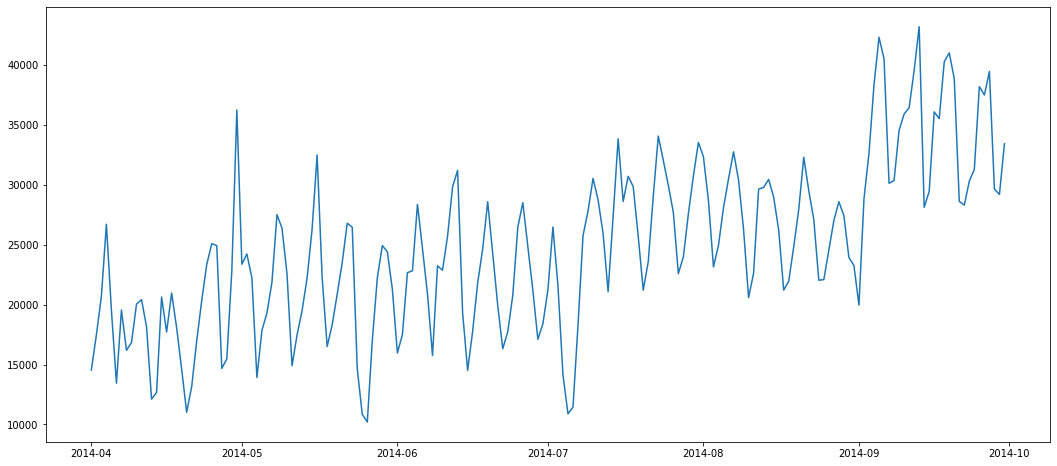

In [91]:
plt.figure(figsize=(18,8))
sns.lineplot(x=combined.Date.value_counts().index,y=combined.Date.value_counts().values)

In [82]:
def rides(combined):
    rang= combined['Base'].nunique(dropna = True)
    print("Total bases are:",rang)
    tot_rides = combined['Base'].value_counts()
    print("No of rides from each bases from Aprit to september is:")
    display(tot_rides)
    print("Total rides on each bases based on Months")
    for i in combined.month.unique():
        print(f"\nMonth {i}\n\n",combined.loc[combined['month'] == i].Base.value_counts())

In [83]:
base_rides = rides(combined)
base_rides

Total bases are: 5
No of rides from each bases from Aprit to september is:


B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: Base, dtype: int64

Total rides on each bases based on Months

Month 4

 B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

Month 5

 B02598    260549
B02682    222883
B02617    122734
B02512     36765
B02764      9504
Name: Base, dtype: int64

Month 6

 B02598    242975
B02682    194926
B02617    184460
B02512     32509
B02764      8974
Name: Base, dtype: int64

Month 7

 B02617    310160
B02598    245597
B02682    196754
B02512     35021
B02764      8589
Name: Base, dtype: int64

Month 8

 B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64

Month 9

 B02617    377695
B02598    240600
B02682    197138
B02764    178333
B02512     34370
Name: Base, dtype: int64


In [84]:
print("Total no of rides based time rided with terms of hours:")
combined['hours'].sort_index().value_counts()

Total no of rides based time rided with terms of hours:


17    336190
18    324679
16    313400
19    294513
20    284604
21    281460
15    275466
22    241858
14    230625
13    195877
7     193094
8     190504
12    170452
23    169190
11    165703
9     159967
10    159148
6     143213
0     103836
5      83939
1      67227
4      55230
3      48287
2      45865
Name: hours, dtype: int64

In [92]:
#Bases which has highest rides

print("The base {0} which has the highest rides at total: {1}".format(combined['Base'].max(),combined['Base'].value_counts().max()))

The base B02764 which has highest rides is 1458853
